In [1]:
using GMT

julia
#region=(-32.40, -32.0, 37.0, 37.4)
#gmt("--MAP_FRAME_TYPE=fancy")
topo = makecpt(color=:plasma, range=(-6000,0,1000), continuous=true);
grdimage("gebco_2020_n45.0_s30.0_w-40.0_e-25.0.nc",
    shade=(azimuth=100, norm="e0.9"), 
    J=:M6i, 
    frame=(axes=:WSen, annot=5, ticks=1,grid=2))

pscoast!(land="lightgreen")
colorbar!(pos=(anchor=:BC, length=(12.5,0.6), horizontal=true, offset=(0,1.0)), 
    frame=(ylabel=:m,), 
    show=true)"""

ridge contours : https://wiki.paleoearthlabs.org/scientificdata/platetectonics/birdplateboundaries

give credit to this person!

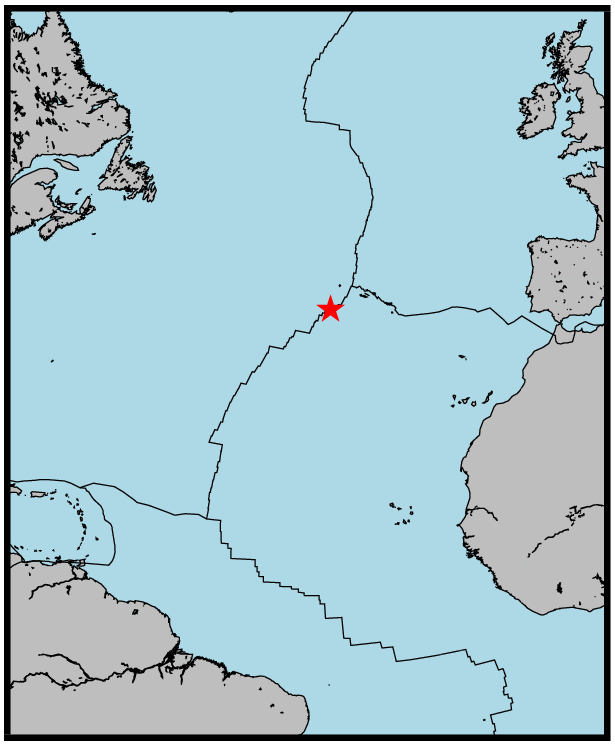

In [153]:
coast(region=(-70,0,-10,60), water=:lightblue, land="grey",
      res=:low, shore=:thinnest, proj=:M2i, frame=:noannot)#, show=1)
psxy!("../../bathy/pb2002_boundaries.gmt")

frame = [-32.3 37.275; -32.3 37.31; -32.26 37.31; -32.26 37.275; -32.3 37.275];

scatter!([-32.3 37.275], fill=:red, marker=:star, markersize=0.25, show=true)#, savefig="../../figures/GMT_maps/LS_location.pdf")


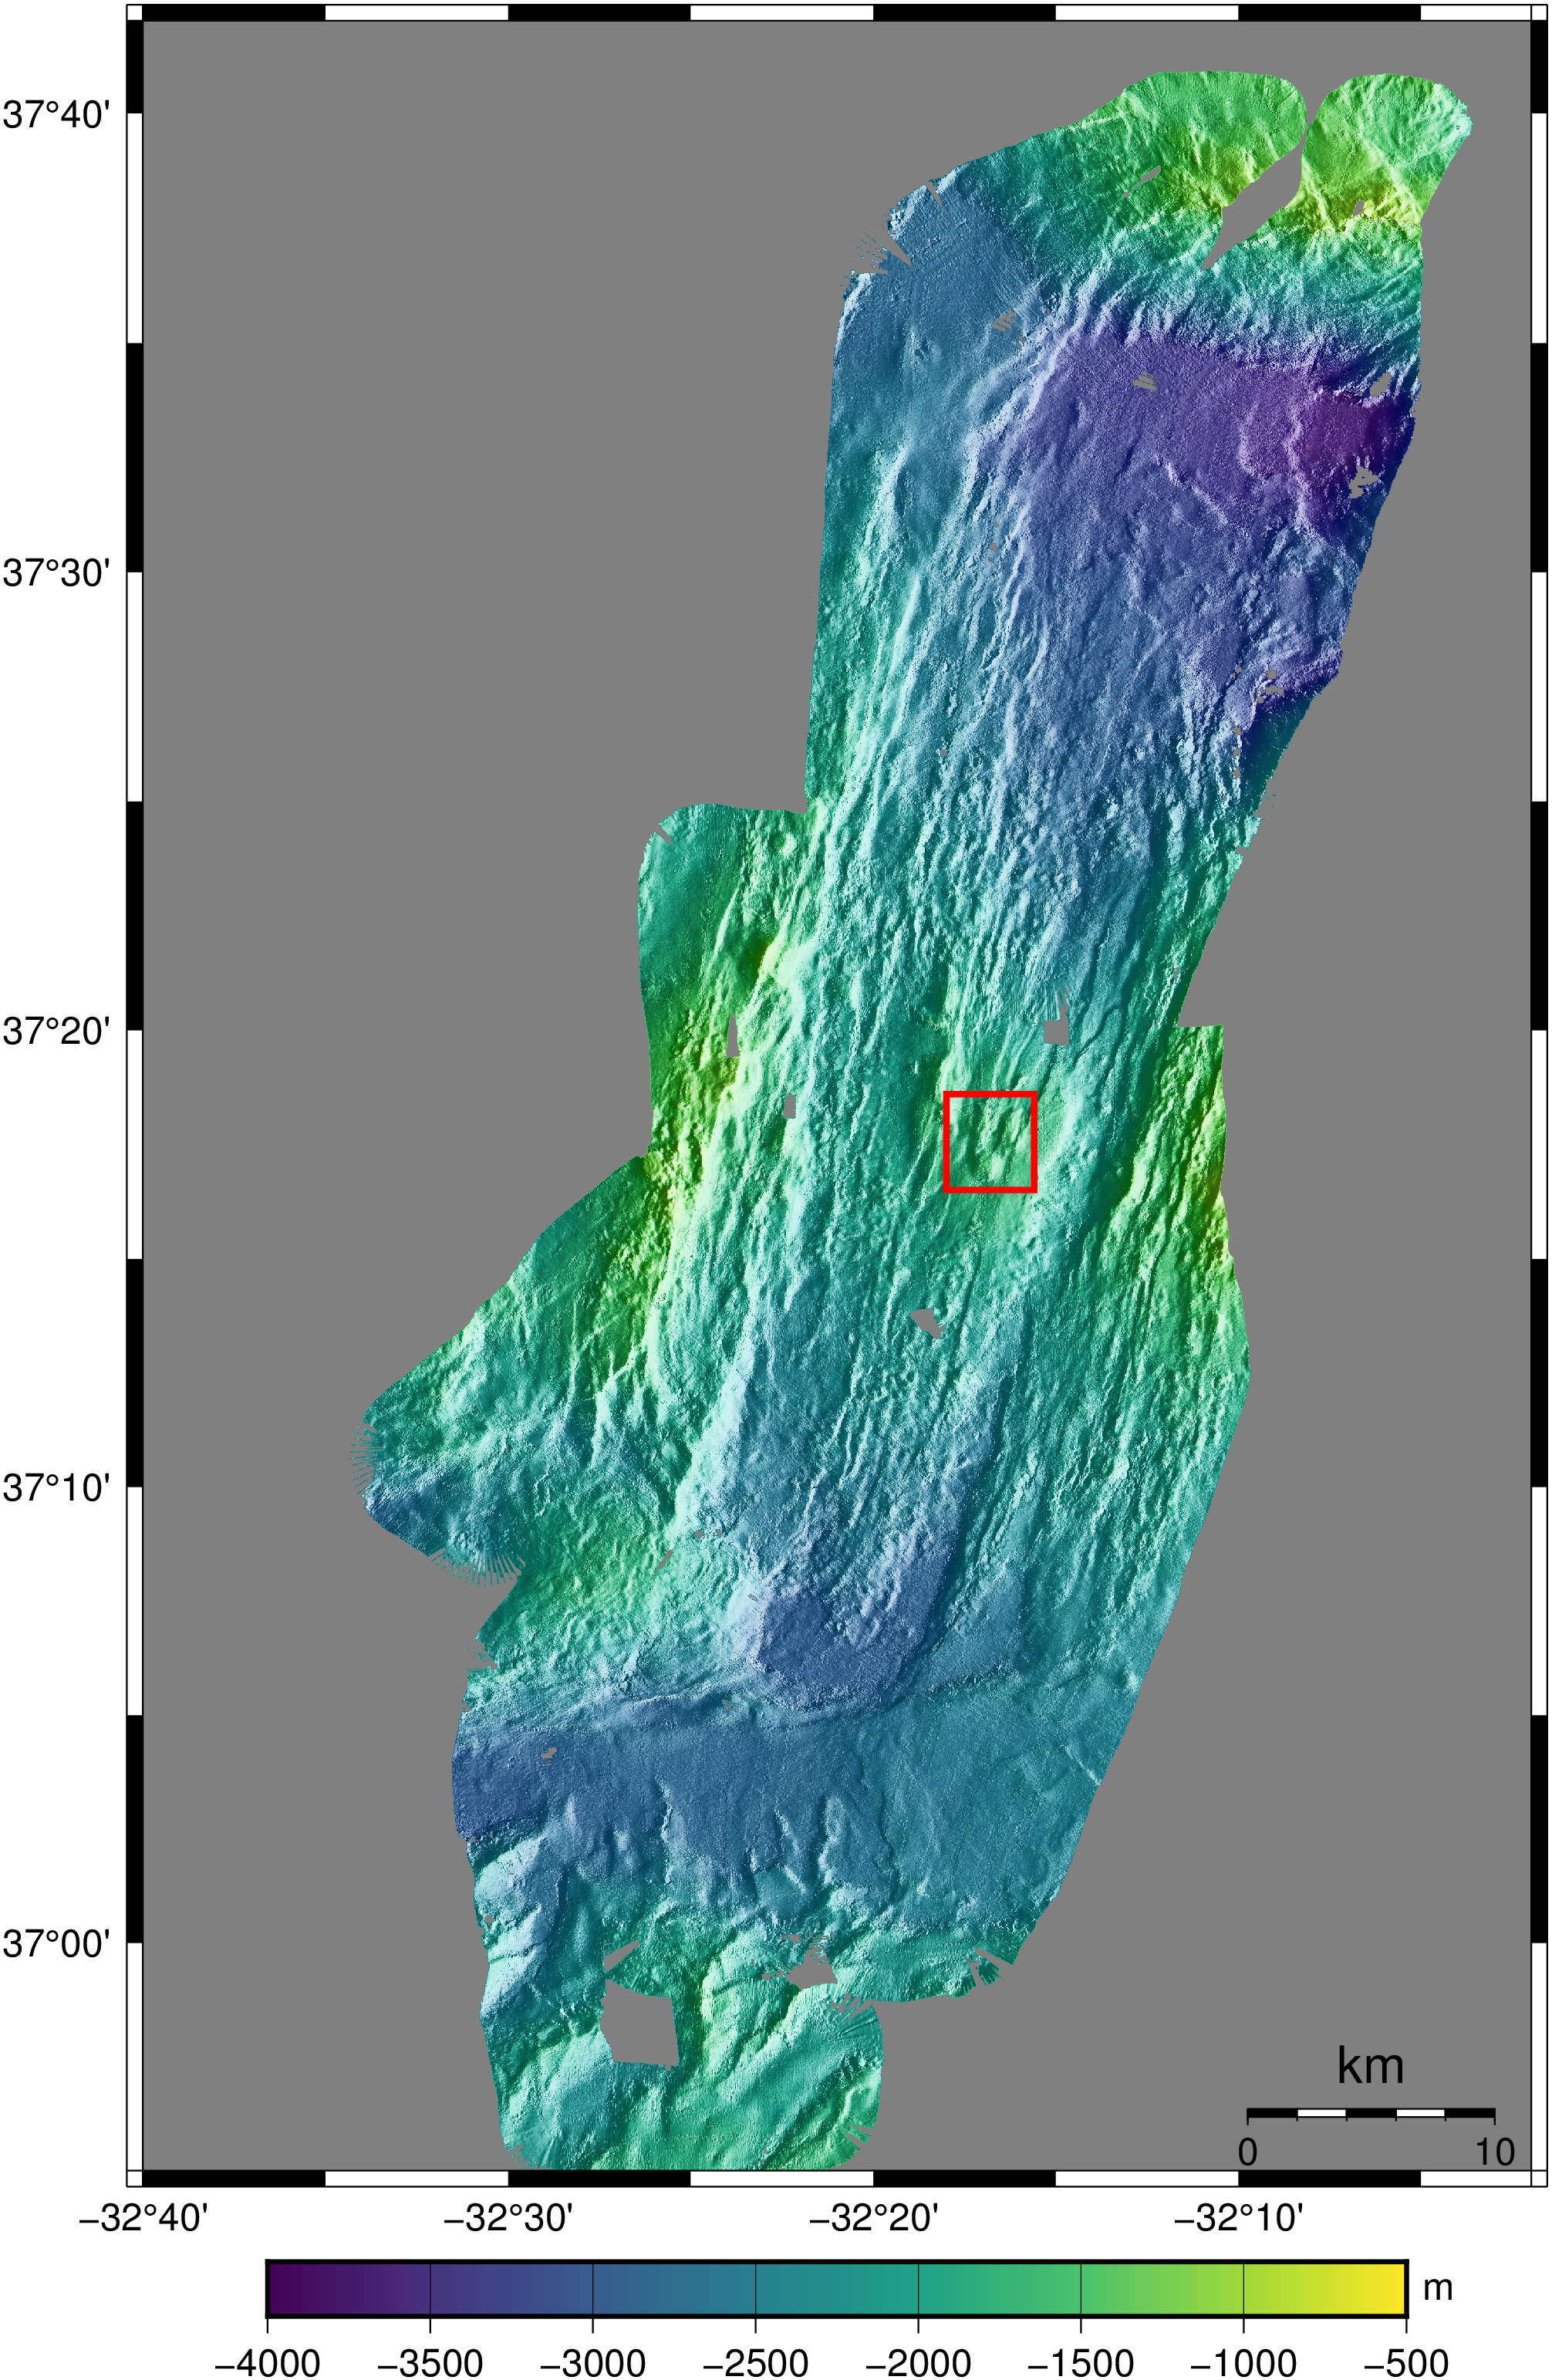

grdinfo [WARNING]: The step size of coordinate (Longitude [decimal degree]) in grid ../../bathy/lucky20m.nc is not constant.
grdinfo [WARNING]: GMT will use a constant step size of 0.000225679; the original ranges from 0.000225067 to 0.000228882.
grdinfo [WARNING]: The step size of coordinate (Latitude [decimal degree]) in grid ../../bathy/lucky20m.nc is not constant.
grdinfo [WARNING]: GMT will use a constant step size of 0.000180193; the original ranges from 0.000179291 to 0.000183105.
grdimage [WARNING]: The step size of coordinate (Longitude [decimal degree]) in grid ../../bathy/lucky20m.nc is not constant.
grdimage [WARNING]: GMT will use a constant step size of 0.000225679; the original ranges from 0.000225067 to 0.000228882.
grdimage [WARNING]: The step size of coordinate (Latitude [decimal degree]) in grid ../../bathy/lucky20m.nc is not constant.
grdimage [WARNING]: GMT will use a constant step size of 0.000180193; the original ranges from 0.000179291 to 0.000183105.
grdgradien

In [249]:
# There is a warning because the grid is not regular, but it works so no complains.

x_min = -32.3
x_max = -32.26
y_min = 37.275
y_max = 37.31

frame = [x_min y_min; x_min y_max; x_max y_max; x_max y_min; x_min y_min];

topo = makecpt(color=:viridis, range=(-4000,-500,500), continuous=true);
grdimage("../../bathy/lucky20m.nc",
    shade=(azimuth=100, norm="e0.9"), 
    J=:M6i, 
    frame=(axes=:WSen, annot="10m", ticks="5m",grid=0))
    #frame=:a)

basemap!(map_scale="jBR+c37.20+w10+f+o0.4/0.5+l")
colorbar!(pos=(anchor=:BC, length=(12.5,0.6), horizontal=true, offset=(0,1.0)), frame=(ylabel=:m,))

plot!(frame,  pen=(2,:red), show=true)#, savefig="../../report_figures/GMT_maps/LS_segment.png")

In [136]:
lucky_R = (-32.30, -32.26, 37.275, 37.31)
file = "bathy.xyz"
G = surface(file, R=lucky_R, I=0.0001)

title: Data gridded with continuous surface splines in tension
command: surface bathy.xyz -R-32.3/-32.26/37.275/37.31 -I0.0001 -G@GMTAPI@-S-O-G-G-G-N-000002
Gridline node registration used
x_min: -32.3	x_max :-32.26	x_inc :9.999999999999786e-5	n_columns :401
y_min: 37.275	y_max :37.31	y_inc :0.00010000000000001056	n_rows :351
z_min: -1865.2750244140625	z_max :-1560.040283203125


In [218]:
(310-275)/2 + 275

292.5

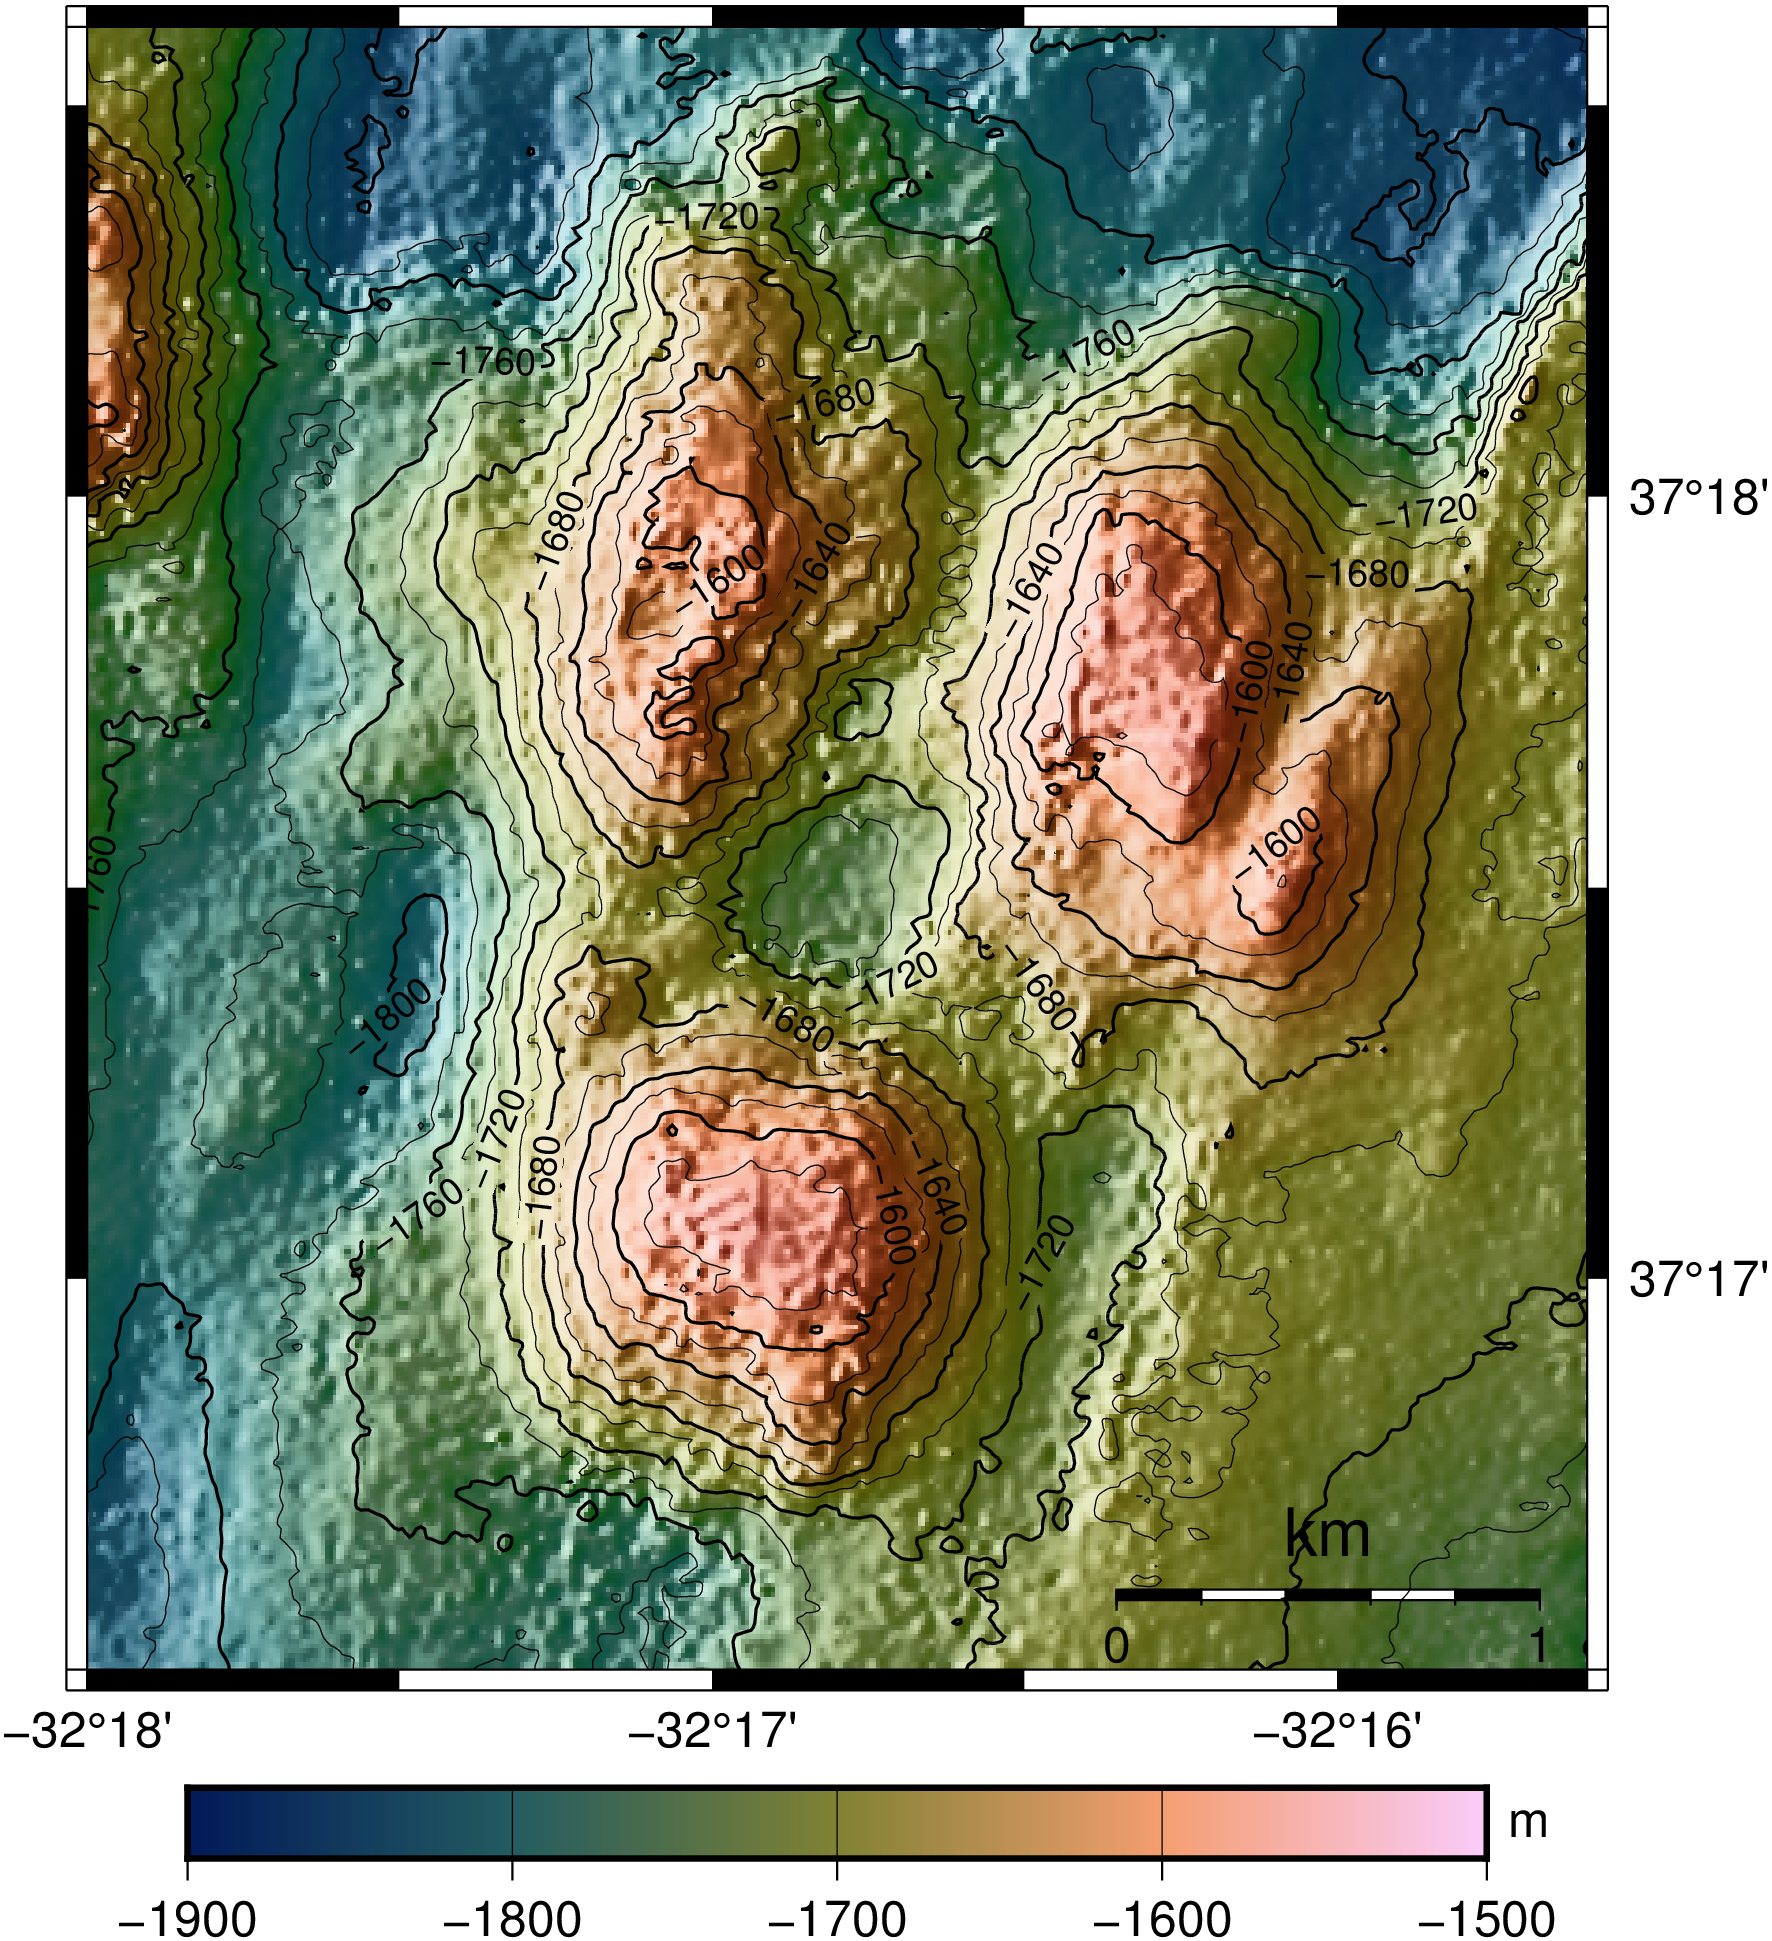

In [251]:
topo = makecpt(color=:batlow, range=(-1900,-1500,100), continuous=true);
grdimage(G, shade=(azimuth=280, norm="e0.9"),
    region=lucky_R,
    proj=:M5i, 
    frame=(axes=:wSEn, annot="1m", ticks="30s",grid=0))

basemap!(map_scale="jBR+c37.29+w1+f+l+o0.4/0.5")

grdcontour!(G, region=(-32.30, -32.26, 37.275, 37.31),
    proj=:Mercator)

colorbar!(pos=(anchor=:BC, length=(11.,0.6), horizontal=true, offset=(0,1.0)), 
    frame=(ylabel=:m,), 
    show=true)#, savefig="../../report_figures/GMT_maps/LS_volcano.png")

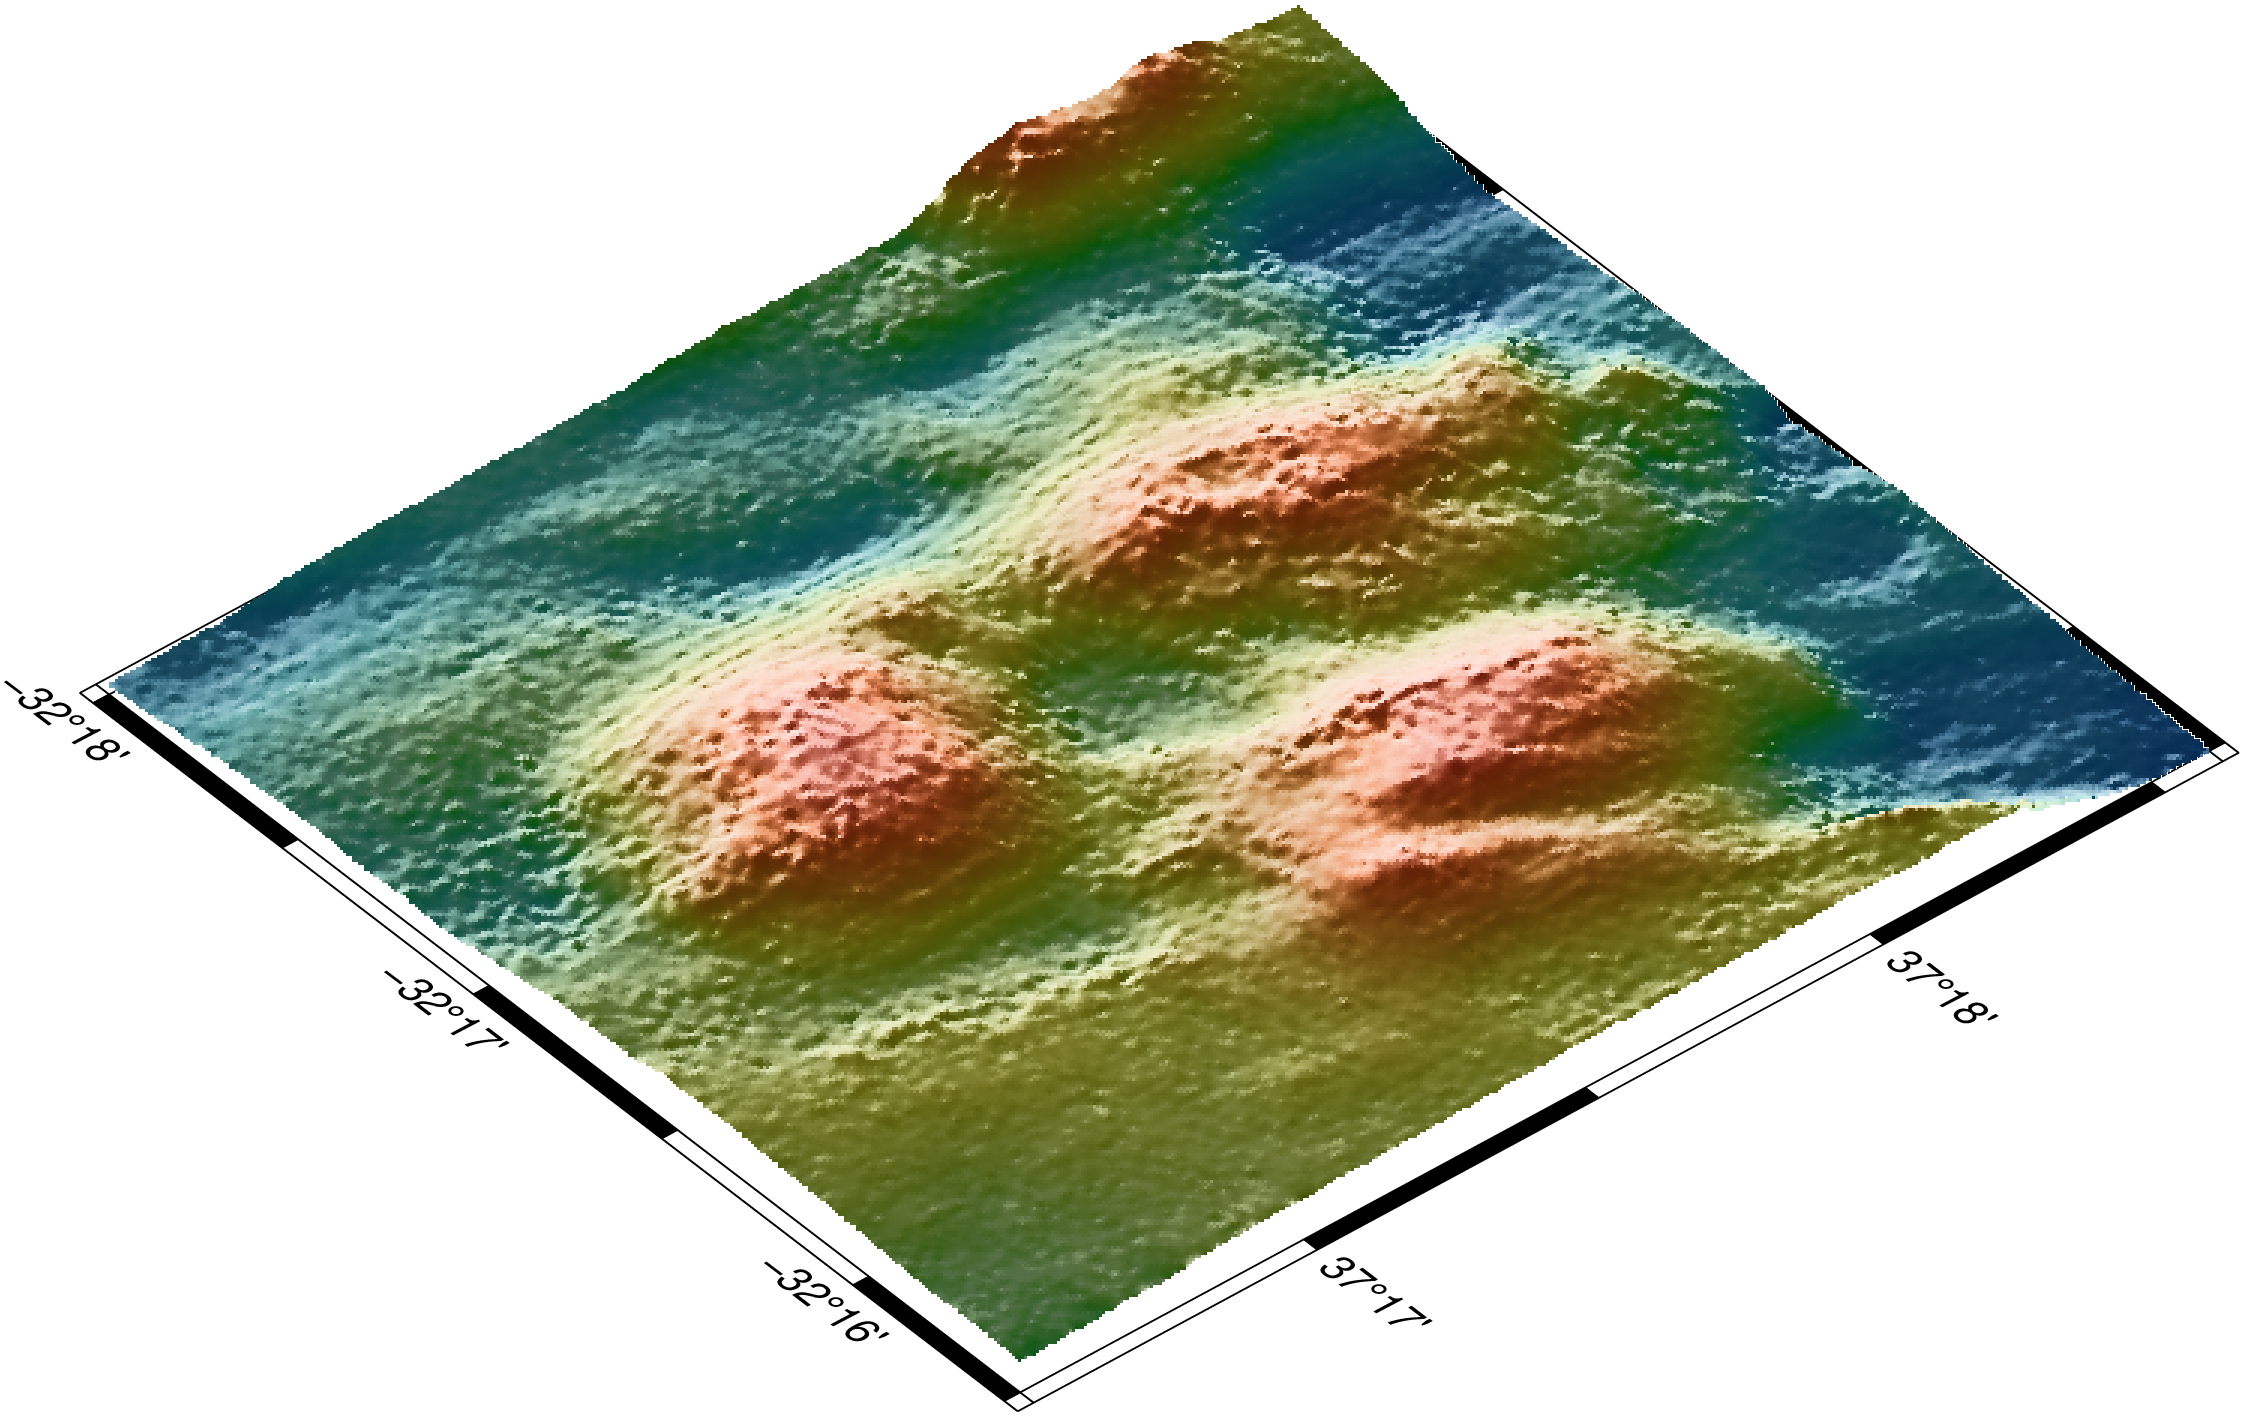

In [213]:
topo = makecpt(color=:batlow, range=(-1900,-1500,100), continuous=true);
grdview(G, 
    region=(-32.30, -32.26, 37.275, 37.31),
    proj=:Mercator,
    zsize=1,
    shade=(azimuth=280, norm="e0.9"),
    view=(130,40), 
    frame=(axes=:ESwn, annot="1m", ticks="30s",grid=0), fmt=:jpg, Q="i100", show=true)

# I <3 GMT.jl